<h1 align = "center">Customer Behaviour: with RFM Analysis</h1>

## PROJECT CONTENT

1. [Introduction](#1)

2. [Overview of RFM Analysis](#2)

3. [Importance of RFM in Business Strategies](#3)

4. [First Organization](#4)
    * 4.1 [Loading our Dataset](#5)
    * 4.2 [Initial Analysis on our Dataset](#6)
        * 4.2.1 [Analysis Outputs (1)](#7)

5. [Exploratory Data Analysis](#8)
    * 5.1 [Dropping Duplicates](#9)
    * 5.2 [Dropping Missing Values](#10)
    * 5.3 [Creating "Total" Column](#11)
    * 5.4 [Calculating RFM Metrics](#12)
    
6. [Data Visualization](#13)
    * 6.1 [Recency Distribution](#14)
    * 6.2 [Frequency Distribution](#15)
    * 6.3 [Monetary Distribution](#16)
    
7. [Customer Segmentation](#17)
    * 7.1 [Data Standardization](#18)
    * 7.2 [KMeans Clustering](#19)
    
8. [Prediction](#20)
    * 8.1 [Predicting Future Customer Spending](#21)
    * 8.2 [Creating a Dummy Target Variable](#22)
    * 8.3 [Splitting our Dataset](#23)
    * 8.4 [Linear Regression Model](#24)
        * 8.4.1 [Evaluating our Model](#25)
    * 8.5 [Decision Tree Regressor](#26)
        * 8.5.1 [Evaluating our Model](#27)
    * 8.6 [Future Predictions](#28)
    
9. [Analysis Report](#29)
    
10. [Conclusion](#30)

## INTRODUCTION<a id="1"></a>

In today's competitive business, it is vital to understand the long-term value of a customer.
Customer Lifetime Value (CLTV) is a metric that represents the total amount of money a customer is expected to spend in your business or your products during their lifetime.
It's a crucial measure that helps businesses in strategizing their marketing efforts, resource allocation and product development.


**IMPORTANCE OF CLTV:**
* **Resource Allocation:** It helps in allocatingresources more efficiently. Instead of spreading resources over all customers, businesses can focus on those who bring in the most value.

* **Product Development and Pricing Strategies:** Understanding the lifetime value of a customer can influence product development strategies. Businesses can design products and services nthat cater to the needs of their most profitable customers. It also helps in setting pricing strategies that maximize profit without losing valuable customers.

* **Predictive Analysis:** It helps in forecasting future revenues and making informed decisions about potential investments in customer acquisition and retention.

* **Focused Marketing and Customer retention:** It enables businesses to identify the most valuable customers, allowing for more targeted and personalized marketing strategies. By understanding who your high-value customers are, you can tailor your marketing efforts to retain these profitable segments.

## OVERVIEW OF RFM ANALYSIS<a id="2"></a>

RFM(RECENCY, FREQUENCY, MONETARY) Analysis is a marketing technique used for quantifying and evaluating customer behaviour. It segments customers based on their tranaction history - how recently and how often they purchased, and how much they spent.


* **Recency(R):** This is the measure of how recently a customer has made a purchase. A recent purchase is a strong indicator that the customer is active and more likely to buy again.


* **Frequency(F):** This accesses how often a customer makes a purchase. Frequent buyers are more likely to continue purchasing in the future, indicating higher loyalty, satisfaction and engagement. While infrequent purchases suggests a need for re-engagement strategies.


* **Monetary Value(M):** This evaluates how much money a customer has spent over time. Customers who spend more are the valuable. This determines the customer's value to the business. High monetary customers contribute more to revenue, while lower spenders may require targeted strategies to increase their purchasing activity.


To successfully perform RFM, our dataset must have some crucial features:

* **Customer Identifier:** A unique identifier for each customer to differentiate between customers and aggregate purchases on a per-customer basis.

* **Transaction/Purchase Date:** Date and time the purchases were made to calculate the Recency component of RFM.

* **Transaction Value:** The monetary value of each transaction to compute the Monetary component of RFM, which is total amount spent by the customer.

* **Transaction Frequency (Optional):** Information on the frequency of transactions. It can as well be done by counting the number of transactions per customer.

## IMPORTANCE OF RFM IN BUSINESS STRATEGIES<a id="3"></a>

By integrating RFM analysis into business strategies, companies can:

* **Optimize Marketing Campaigns:** RFM analysis can drive more effective marketing campaigns by targeting the right customers with the right message at the right time.

* **Improve Customer Service:** Understanding different segments helps in tailoring customer service efforts to meet the specific needs and preferences of each group.

* **Increase Customer Loyalty:** By focusing on customers who are more likely to make frequent and recent purchases, businesses can implement strategies to boost customer loyalty.

* **Identify Potential High-Value Customers:** It helps in spotting customers with the potential to become high-value patrons based on their buying patterns.

* **Personalized Customer Engagement:** It gives room for more personalized communications and offers, as customers are segmented based on their purchasing behaviour.


It is a great tool for business aiming to thrive in a customer-centric era. It helps in serving current customers and also in predicting and shaping future customer interactions and profitability.

## FIRST ORGANIZATION<a id="4"></a>

### 4.1 Loading Our DataSet<a id="5"></a>

In [3]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# Try reading the file with a different encoding
retail_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv', encoding='latin-1')
# You can try 'iso-8859-1' if 'latin-1' does not work

In [6]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 4.2 Initial Analysis On Our Dataset<a id="6"></a>

In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
retail_df.shape

(541909, 8)

In [12]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### 4.2.1 Analysis Outputs (1)<a id="7"></a>

* Our dataset has 541909 rows and 8 columns.

* Our dataset has 1 datetime, 2 floats, 1 integer and 4 objects data types.

* There are 1454 and 135080 missing values in Description and CustomerID columns respectively.

## EXPLORATORY DATA ANALYSIS (EDA)<a id="8"></a>

### 5.1 Dropping Duplicates<a id="9"></a>

In [13]:
# Removing duplicates
retail_df.drop_duplicates(inplace = True)

### 5.2 Dropping Missing Values<a id="10"></a>

In [14]:
# Dropping missing values
retail_df.dropna(subset = ['CustomerID'], inplace = True)

### 5.3 Creating "Total" Column<a id="11"></a>

In [15]:
# Creating "Total" column representing total spending per transaction
retail_df['Total'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [16]:
retail_df["InvoiceDate"].max()

'9/9/2011 9:52'

### 5.4 Calculating RFM Metrics<a id="12"></a>

In [18]:
import datetime as dt

# Convert 'InvoiceDate' to datetime object if it's not already
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

#Recency
latest_date = retail_df['InvoiceDate'].max() + dt.timedelta(days = 1)

rfm = retail_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total': 'sum'
}).reset_index()

rfm.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total': 'MonetaryValue'
}, inplace = True)

In [19]:
#Recency score based on quantiles
#Assigning labels from 1-5,  1 being the lowest recency
rfm["Recency_score"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])

#Frequency score
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])

In [20]:
#Combine Recency and Frequency scores to create RFM Segment
rfm["rfm_segment"] = rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str)

In [21]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,2,0.00,1,1,11
1,12347.0,2,182,4310.00,5,5,55
2,12348.0,75,31,1797.24,2,3,23
3,12349.0,19,73,1757.55,4,4,44
4,12350.0,310,17,334.40,1,2,12
...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,11
4368,18281.0,181,7,80.82,1,1,11
4369,18282.0,8,13,176.60,5,1,51
4370,18283.0,4,721,2045.53,5,5,55


## DATA VISUALIZATION<a id="13"></a>

### 6.1 Recency Distribution<a id="14"></a>

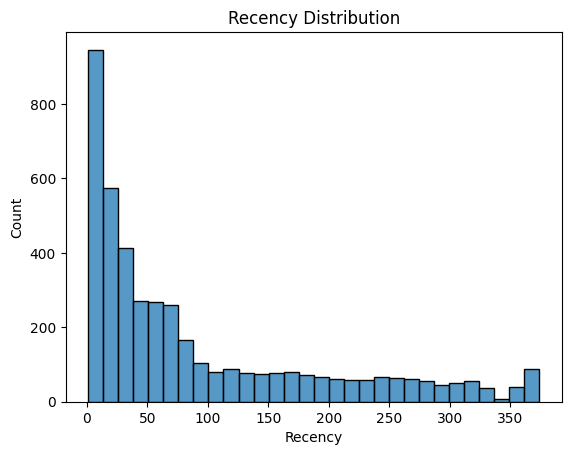

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
#Eliminating Future warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
####################################
# recency Distribution
sns.histplot(data = rfm, x = 'Recency', bins = 30)
plt.title('Recency Distribution')
plt.show()

### 6.2 Frequency Distribution<a id="15"></a>

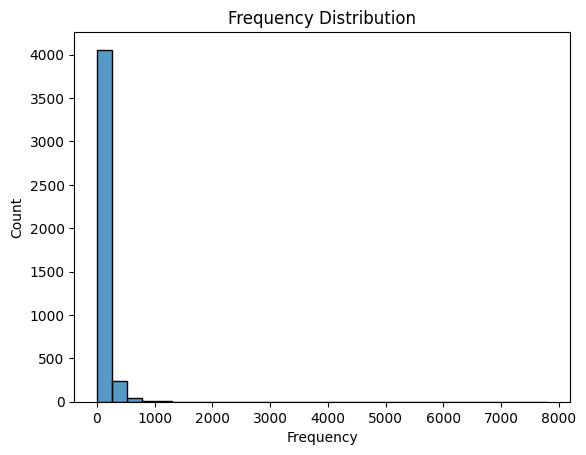

In [23]:
# Frequency Distribution
sns.histplot(data = rfm, x = 'Frequency', bins = 30)
plt.title('Frequency Distribution')
plt.show()

### 6.3 Monetary Distribution<a id="16"></a>

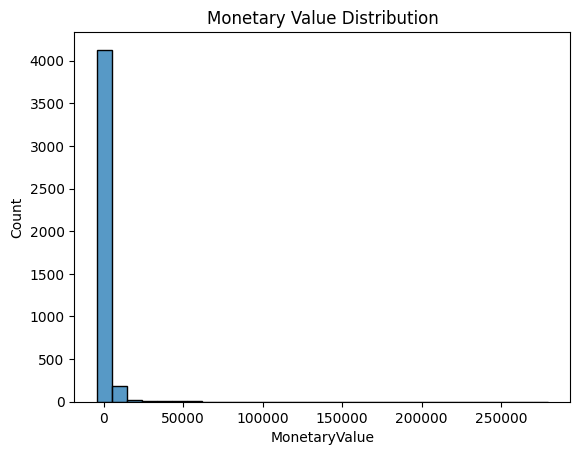

In [24]:
# Monetary Distribution
sns.histplot(data = rfm, x = 'MonetaryValue', bins = 30)
plt.title('Monetary Value Distribution')
plt.show()

## CUSTOMER SEGMENTATION<a id="17"></a>

In [25]:
#Mapping segments to their corresponding customer segments
segment_map = {
    r'[1-2][1-2]' : 'Hibernating',
    r'[1-2][3-4]' : 'At-Risk',
    r'[1-2]5' : "Can\'t Loose",
    r'3[1-2]' : 'About to Slip',
    r'33' : 'Need Attention',
    r'[3-4][4-5]' : 'Loyal Customers',
    r'41' : 'Promising',
    r'51' : 'New Customers',
    r'[4-5][2-3]' : 'Potential Loyalists',
    r'5[4-5]' : 'Champions',
}

In [26]:
#Mapping RFM segments to corresponding customer segments
rfm['rfm_segment'] = rfm['rfm_segment'].replace(segment_map, regex = True)

In [27]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,2,0.00,1,1,Hibernating
1,12347.0,2,182,4310.00,5,5,Champions
2,12348.0,75,31,1797.24,2,3,At-Risk
3,12349.0,19,73,1757.55,4,4,Loyal Customers
4,12350.0,310,17,334.40,1,2,Hibernating
...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,Hibernating
4368,18281.0,181,7,80.82,1,1,Hibernating
4369,18282.0,8,13,176.60,5,1,New Customers
4370,18283.0,4,721,2045.53,5,5,Champions


### 7.1 Data Standardization<a id="18"></a>

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

rfm_scaled

array([[ 2.32202285, -0.39205597, -0.23041952],
       [-0.89373323,  0.39329343,  0.29405454],
       [-0.1691956 , -0.26552745, -0.01171748],
       ...,
       [-0.83418219, -0.34406239, -0.20892947],
       [-0.87388289,  2.74497857,  0.01849636],
       [-0.48680114, -0.09536842, -0.00684511]])

### 7.2 KMeans Clustering<a id="19"></a>

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

We will categorize the customers based on their RFM values into groups such as **"Loyal Customers"**, **"New Customers"**, **"At-Risk Customers"** and **"Lost Customers"**.

* **Champions:** Bought recently, buy often and spend the most.

* **Loyal Customers (High Frequency, Low Recency, High Monetary):** These customers buy often and spend a lot. They are recent buyers, indicating ongoing engagement.

* **Potential Loyalist:** Recent customers but spent a good amount and bought more than once.

* **Recent Customers:** Bought most recently but not often.

* **Promising:** Recent buyers but haven't spent much.

* **Customers Needing Attention:** Above average recency, frequency and monetary values. May not have bought very recently though.

* **About to Slip:** Below average recency, frequency and monetary values. Will lose them if not reactivated.

* **New Customers (Low Frequency, Low Recency, Low/Medium Monetary):** These are customers who have started buying recently but have not yet bought frequently or spent a lot.


* **At-Risk Customers (Low Frequency, High Recency, Medium/High Monetary):** These are customers who used to buy frequently and spend a significant amount, but it's been long time they purchased.

* **Lost Customers (Low Frequency, High Recency, Low Monetary):** These customers have not purchased in a long time, they seldom bought and when they do, they spend little.

* **Can't Lose Them:** Made biggest purchases and often. But haven't returned for a long time.

* **Hibernating:** Last purchases was long back, with low spenders and low number of orders.

In [30]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment,Cluster
0,12346.0,326,2,0.00,1,1,Hibernating,3
1,12347.0,2,182,4310.00,5,5,Champions,0
2,12348.0,75,31,1797.24,2,3,At-Risk,0
3,12349.0,19,73,1757.55,4,4,Loyal Customers,0
4,12350.0,310,17,334.40,1,2,Hibernating,3
...,...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,Hibernating,3
4368,18281.0,181,7,80.82,1,1,Hibernating,3
4369,18282.0,8,13,176.60,5,1,New Customers,0
4370,18283.0,4,721,2045.53,5,5,Champions,0


In [31]:
new_rfm = rfm[["Recency", "Frequency", "MonetaryValue", "rfm_segment"]]

In [32]:
#Convert index to integer
new_rfm.index = new_rfm.index.astype(int)
new_rfm.head()

,Recency,Frequency,MonetaryValue,rfm_segment
0,326,2,0.00,Hibernating
1,2,182,4310.00,Champions
2,75,31,1797.24,At-Risk
3,19,73,1757.55,Loyal Customers
4,310,17,334.40,Hibernating


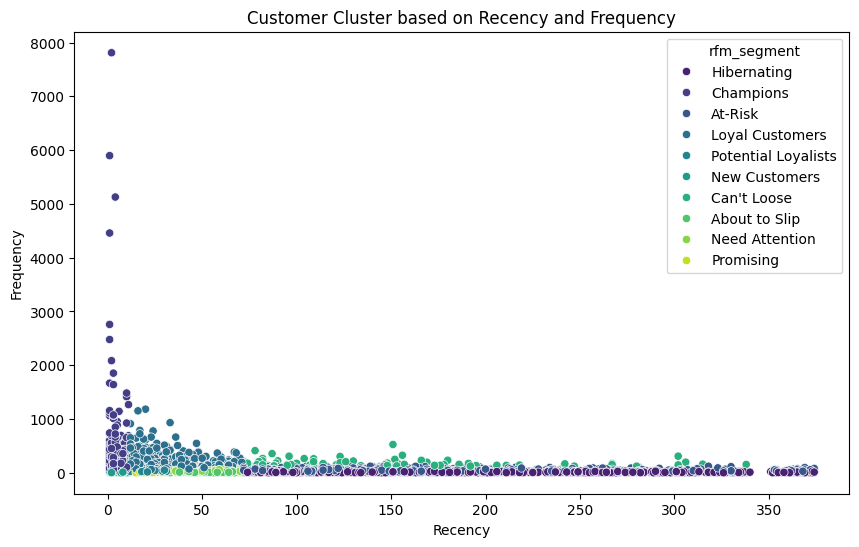

In [33]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'rfm_segment', data = new_rfm, palette = 'viridis')
plt.title('Customer Cluster based on Recency and Frequency')
plt.show()

In [34]:
 import plotly.express as px
#Top 10 most preferred products
segments = new_rfm['rfm_segment'].value_counts()

fig = px.bar(
     x = segments.index,
     y = segments.values,
     color = segments.index,
     text = segments.values,
     title = "RFM Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.show()

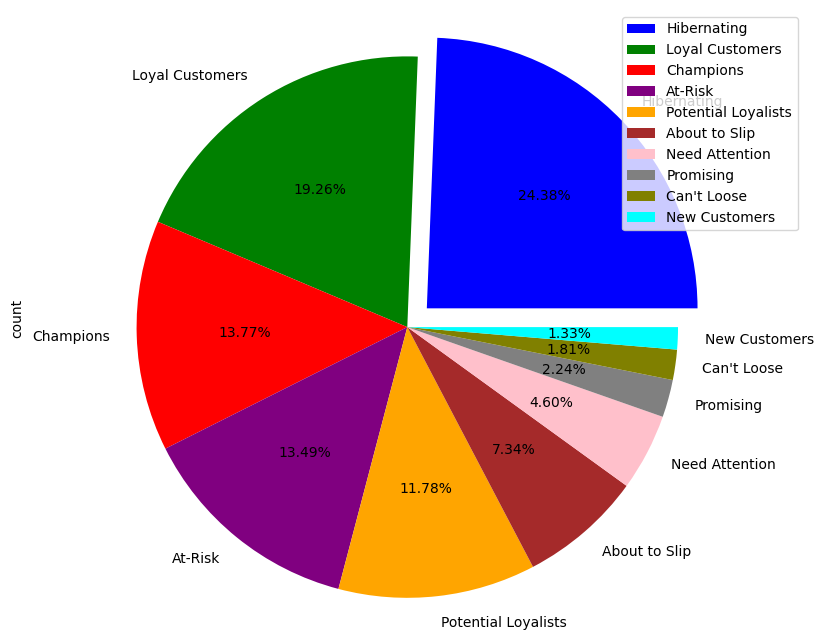

In [37]:
plt.figure(figsize = (10, 8), )
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Define a list of colors for the segments
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Use 'colors' instead of 'color' to specify segment colors
segments.plot(
    kind = 'pie',
    colors=colors, # Assign the defined colors to the segments
    explode = explode,
    autopct = '%1.2f%%')

plt.axis('equal')
plt.legend(labels = segments.index, loc = "best")
plt.show()

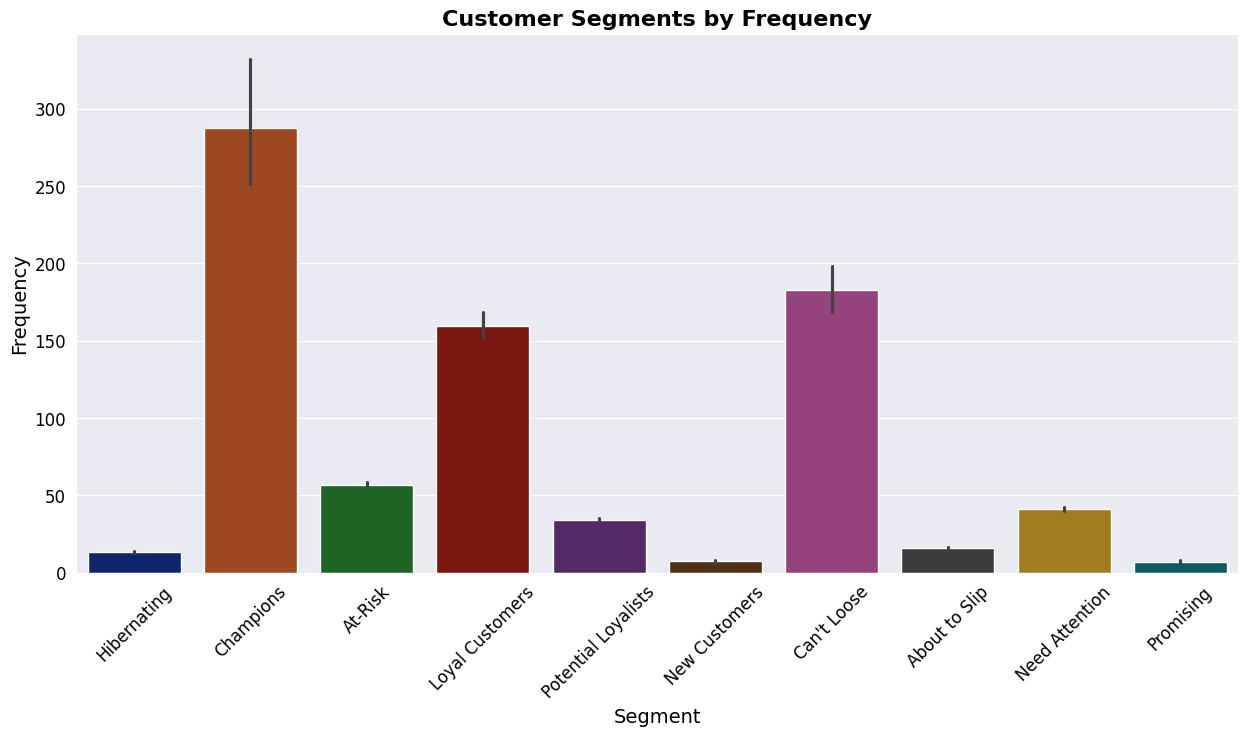

In [38]:
sns.set_style("darkgrid")
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x = "rfm_segment", y = "Frequency", data = new_rfm, palette=colors)
plt.title("Customer Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

In [39]:
new_rfm[["rfm_segment","Recency", "Frequency", "MonetaryValue"]].groupby("rfm_segment").agg(["mean", "count","sum"])

Recency                 Frequency                \
                           mean count     sum        mean count     sum   
rfm_segment                                                               
About to Slip         52.239875   321   16769   15.732087   321    5050   
At-Risk              164.706780   590   97177   56.532203   590   33354   
Can't Loose          140.620253    79   11109  182.607595    79   14426   
Champions              5.280731   602    3179  287.362126   602  172992   
Hibernating          212.132270  1066  226133   13.332083  1066   14212   
Loyal Customers       32.276722   842   27177  159.731591   842  134494   
Need Attention        51.213930   201   10294   41.079602   201    8257   
New Customers          6.689655    58     388    7.517241    58     436   
Potential Loyalists   15.491262   515    7978   34.339806   515   17685   
Promising             22.714286    98    2226    7.122449    98     698   

                    MonetaryValue                     
                             mean count          sum  
rfm_segment                                           
About to Slip          410.643209   321   131816.470  
At-Risk                949.998797   590   560499.290  
Can't Loose           2359.026595    79   186363.101  
Champions             6903.407957   602  4155851.590  
Hibernating            368.246953  1066   392551.252  
Loyal Customers       2575.195285   842  2168314.430  
Need Attention         799.003985   201   160599.801  
New Customers          675.133103    58    39157.720  
Potential Loyalists    858.925670   515   442346.720  
Promising              418.561735    98    41019.050

## PREDICTION<a id="20"></a>

### 8.1 Predicting Future Customer Spending<a id="21"></a>

In [40]:
features = rfm[['Recency', 'Frequency', 'MonetaryValue']]

### 8.2 Creating a Dummy Target Variable<a id="22"></a>

In [41]:
# Target Variable
import numpy as np
#MoneytaryValue = rfm['MonetaryValue']
rfm['FutureSpending'] = np.random.rand(len(rfm)) * 3000

In [42]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment,Cluster,FutureSpending
0,12346.0,326,2,0.00,1,1,Hibernating,3,1922.244080
1,12347.0,2,182,4310.00,5,5,Champions,0,1161.974414
2,12348.0,75,31,1797.24,2,3,At-Risk,0,2380.213538
3,12349.0,19,73,1757.55,4,4,Loyal Customers,0,2709.679665
4,12350.0,310,17,334.40,1,2,Hibernating,3,1845.692608
...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,Hibernating,3,2582.079593
4368,18281.0,181,7,80.82,1,1,Hibernating,3,1839.169072
4369,18282.0,8,13,176.60,5,1,New Customers,0,1594.064095
4370,18283.0,4,721,2045.53,5,5,Champions,0,428.988798


### 8.3 Splitting Our Dataset<a id="23"></a>

In [43]:
from sklearn.model_selection import train_test_split

X = features
y = rfm['FutureSpending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 8.4 Linear Regression Modelling<a id="24"></a>

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### 8.4.1 Evaluating our Model<a id="25"></a>

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 752071.7190322411
R^2 Score: 0.00016533146065567106


In [46]:
results_df = pd.DataFrame({'Future Spending': y_test, 'Predicted Spending': pred})
results_df

,Future Spending,Predicted Spending
2014,1779.443189,1505.357244
457,1304.920131,1511.945085
478,2146.454165,1501.803386
438,395.092125,1513.701515
3728,1352.846728,1514.574336
...,...,...
733,2482.095315,1513.958529
56,1558.641114,1511.510898
2323,717.721303,1513.803275
1720,6.909597,1502.858995


## 8.5 Decision Tree Regressor<a id = "26"></a>

In [47]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

#### 8.5.1 Evaluating our Model<a id="27"></a>

In [48]:
dtr_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test, dtr_pred)
r2 = r2_score(y_test, dtr_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1493472.293071217
R^2 Score: -0.9854826838017829


In [49]:
results_df = pd.DataFrame({'Future Spending': y_test, 'Predicted Spending': dtr_pred})
results_df

,Future Spending,Predicted Spending
2014,1779.443189,1474.015311
457,1304.920131,1561.957898
478,2146.454165,268.305376
438,395.092125,553.641385
3728,1352.846728,1050.864055
...,...,...
733,2482.095315,133.488681
56,1558.641114,2549.045109
2323,717.721303,964.288178
1720,6.909597,805.239687


### 8.6 Future Predictions<a id="28"></a>

In [50]:
new_customer_rfm = np.array([[10, 5, 300]])
pred_spending = lin_reg.predict(new_customer_rfm)

print(f"Predicted Future Spending: {pred_spending[0]}")

Predicted Future Spending: 1515.5075685535946


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



## ANALYSIS REPORT<a id="29"></a>

* We were able to segment customers based on their recency, frequency and monetary value.

* We were able to detect our most valuable customers.

* We were able to detect our loyal customers.

* We were able to detect our new customers.

* We were able to detect our lost customers, so we will probably find out why they left us and how to regain their loyalties.

* We were able to develop a model for predicting future customer spending based on RFM analysis.


## CONCLUSION<a id="30"></a>

* RFM Analysis is a crucial tool for understanding customer behaviour and segmenting them based on purchasing habits.

* RFM helps in personalizing marketing strategies and improving customer engagement and retention.

## ANALYSIS RECOMENDATIONS

**About to Slip**
* Mean Recency: 52.24 (321 Customers)
* Mean Frequency: 15.73 (5050 Purchases)
* Mean Monetary Value: 410.64(Sum: 131,816.47)

**Recommendations:**
* Offer loyalty rewards or VIP programs to further incentivize their frequent purchases.
* Provide exclusive offers or early access to new products/services to maintain their engagement.



**At Risk**
* Mean Recency:164.71 (590 Customers)
* Mean Frequency: 56.53 (33,354 Purchases)
* Mean Monetary Value: 949.999(Sum: 560,499.29)

**Recommendations:**
* Implement targeted re-engagement campaigns to remind them of your value proposition.
* Offer personalized discounts or promotions to encourage repeat purchases.



**Can't Loose**
* Mean Recency:140.62 (79 Customers)
* Mean Frequency: 182.61 (14,426 Purchases)
* Mean Monetary Value: 2359.03(Sum: 186,363.10)

**Recommendations:**
* Reaching out to them to know why they have not returned for long time.
* Discount sales.



**Champions**
* Mean Recency:5 (602 Customers)
* Mean Frequency: 287.36 (172,992 Purchases)
* Mean Monetary Value: 6903.41(Sum: 4,155,851.59)

**Recommendations:**
* There should be incentives for them quarterly or annualy.
* There should be a little bit of discount on all their purchases.




**Hibernating**
* Mean Recency: 212.13 (1,066 Customers)
* Mean Frequency: 13.33 (14,212 Purchases)
* Mean Monetary Value: 368.25(Sum: 392,551.25)

**Recommendations:**
* Reach out with personalized win-back offers or discounts to encourage them to return.
* Conduct surveys or feedback sessions to understand why they stopped purchasing and address any concerns.



**Loyal Customers**
* Mean Recency: 32.28 (842 Customers)
* Mean Frequency: 159.73 (134,494 Purchases)
* Mean Monetary Value: 2575.195(Sum: 2,168,314.43)

**Recommendations:**
* These are the customers that bring more customers, so there should be incentives for them for their referrals.




**Need Attention**
* Mean Recency: 51.214 (201 Customers)
* Mean Frequency: 41,08 (8,257 Purchases)
* Mean Monetary Value: 799.00(Sum: 160,599.80)



**New Customers**
* Mean Recency:6.69 (58 Customers)
* Mean Frequency: 7.52 (436 Purchases)
* Mean Monetary Value: 675.13(Sum: 39,157.72)

**Recommendations:**
* Welcome them with a special discount or promotion for their next purchase to encourage repeat business.
* Implement an onboarding email series to introduce them to your products/services.



**Potential Loyalists**
* Mean Recency:15.49 (515 Customers)
* Mean Frequency: 34.34 (17,685 Purchases)
* Mean Monetary Value: 858.93(Sum: 442,346.72)

**Recommendations:**
* Offer incentives for increasing their frequency of purchases, such as referral bonuses or points-based rewards.
* Provide personalized product recommendations based on their past purchases to enhance their shopping experience.



**Promising**
* Mean Recency: 22.71 (98 Customers)
* Mean Frequency: 7.12 (698 Purchases)
* Mean Monetary Value: 418.56(Sum: 41,019.05)